In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

path = '../data/'

In [4]:
data_um = pd.read_csv(path + "responses_unimodal.csv", dtype=str)
data_mm = pd.read_csv(path + "responses_multimodal.csv", dtype=str)

times_tweet = data_um['created_time'].tolist() + data_mm['created_time'].tolist()
times_human_high = data_um['note_1_created_time'].tolist() + data_mm['note_1_created_time'].tolist()
times_human_avg = data_um['note_2_created_time'].tolist() + data_mm['note_2_created_time'].tolist()

times_tweet = [datetime.strptime(time, "%Y-%m-%d %H:%M:%S") for time in times_tweet]
times_human_h = [datetime.strptime(time.replace('\t', ''), "%Y-%m-%d %H:%M:%S") for time in times_human_high]
times_human_m = [datetime.strptime(time.replace('\t', ''), "%Y-%m-%d %H:%M:%S") for time in times_human_avg]

time_delta_high = [times_human_h[i] - times_tweet[i] for i in range(len(times_tweet))]
time_delta_high = [time.days * 24 + time.seconds / 3600 for time in time_delta_high]
time_delta_avg = [times_human_m[i] - times_tweet[i] for i in range(len(times_tweet))]
time_delta_avg = [time.days * 24 + time.seconds / 3600 for time in time_delta_avg]

12.69138888888889
16.07138888888889


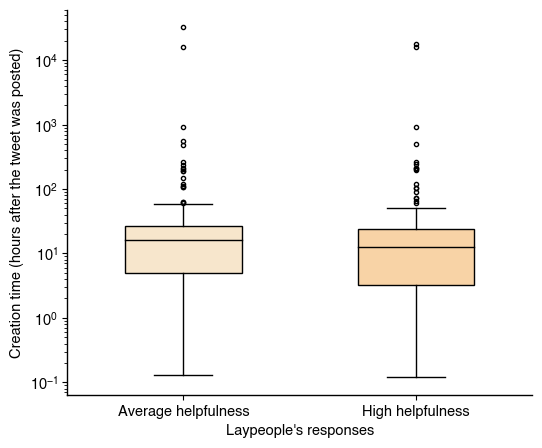

In [5]:
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size'] = 10.5

data_dict = {
    'Laypeople (avg)': time_delta_avg,
    'Laypeople (high)': time_delta_high
}

method_color = {
    'Laypeople (avg)': '#F7E6CC',
    'Laypeople (high)': '#F8D3A6'
}

_, ax = plt.subplots(figsize=(6,5))
boxes = ax.boxplot(data_dict.values(), widths=0.5, sym='.', patch_artist=True)

for i, box in enumerate(boxes['boxes']):
    box.set(color=list(method_color.values())[i], edgecolor='k')
for i, box in enumerate(boxes['medians']):
    box.set(color='k', linewidth=1)

plt.ylabel('Creation time (hours after the tweet was posted)')
plt.xticks(ticks=[1, 2], labels=['Average helpfulness', 'High helpfulness'])
plt.xlabel('Laypeople\'s responses')
plt.yscale('log')

plt.setp(ax.spines.values(), color='k', linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

print(np.median(data_dict['Laypeople (high)']))
print(np.median(data_dict['Laypeople (avg)']))